# Calibrating TTim model to hypothetical pumping test

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ttim import *

### Use observation times from Oude Korendijk

In [2]:
drawdown = np.loadtxt('data/oudekorendijk_h30.dat')
tobs = drawdown[:,0] / 60 / 24
robs = 30
Q = 788

### Generate data

In [3]:
ml = ModelMaq(kaq=60, z=(-18, -25), Saq=1e-4, tmin=1e-5, tmax=1)
w = Well(ml, xw=0, yw=0, rw=0.1, tsandQ=[(0, 788)], layers=0)
ml.solve()
np.random.seed(2)
hobs = ml.head(robs, 0, tobs)[0] + 0.05 * np.random.randn(len(tobs))

self.neq  1
solution complete


### See if TTim can find aquifer parameters back
Note that the value of Saq0 is printed incorrectly to the screen in the fit report (`lmfit` will fix this hopefully in the near future - issue has be posted). The correct fitted value is printed below the fit report. 

In [4]:
cal = Calibrate(ml)
cal.set_parameter(name='kaq0', initial=100)
cal.set_parameter(name='Saq0', initial=1e-3)
cal.series(name='obs1', x=robs, y=0, layer=0, t=tobs, h=hobs)
cal.fit_least_squares(report=True)

.........................................................
          optimal       std perc_std  pmin  pmax initial  \
kaq0      59.5517  2.015597  3.38462  -inf   inf     100   
Saq0  9.23069e-05  0.000011  12.4159  -inf   inf   0.001   

                       parray  
kaq0      [59.55168336640703]  
Saq0  [9.230691326808151e-05]  
[2.01559666e+00 1.14607508e-05]
[[ 4.06262991e+00 -1.89996992e-05]
 [-1.89996992e-05  1.31348809e-10]]
[[ 1.         -0.82248886]
 [-0.82248886  1.        ]]


In [5]:
cal = Calibrate(ml)
cal.set_parameter(name='kaq0', initial=100)
cal.set_parameter(name='Saq0', initial=1e-3)
cal.series(name='obs1', x=robs, y=0, layer=0, t=tobs, h=hobs)
cal.fit_lmfit()

........................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 34
    # variables        = 2
    chi-square         = 0.09714820
    reduced chi-square = 0.00303588
    Akaike info crit   = -195.167858
    Bayesian info crit = -192.115137
[[Variables]]
    kaq0:  59.5338650 +/- 2.36744635 (3.98%) (init = 100)
    Saq0:  9.2404e-05 +/- 1.2508e-05 (13.54%) (init = 0.001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.851


In [6]:
cal.parameters

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,59.5339,2.367446,3.97664,-inf,inf,100,[59.533865047843506]
Saq0,9.24039e-05,0.000013,13.5367,-inf,inf,0.001,[9.240385217435928e-05]


In [7]:
print('rmse:', cal.rmse())

rmse: 0.05345371782531853


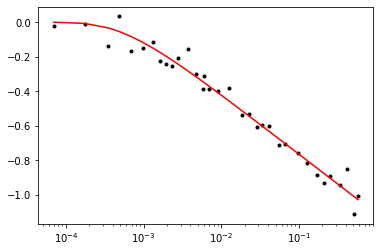

In [8]:
hm = ml.head(robs, 0, tobs, 0)
plt.semilogx(tobs, hobs, '.k')
plt.semilogx(tobs, hm[0], 'r')

In [9]:
print('correlation matrix')
print(cal.fitresult.covar)

correlation matrix
[[ 5.60480223e+00 -2.51954384e-05]
 [-2.51954384e-05  1.56461834e-10]]


## Calibrate parameters in multiple layers
Example showing how parameters can be optimized when multiple layers share the same parameter value.

In [10]:
ml = ModelMaq(kaq=[10., 10.], z=(-10, -16, -18, -25), c=[10.], Saq=[0.1, 1e-4], tmin=1e-5, tmax=1)
w = Well(ml, xw=0, yw=0, rw=0.1, tsandQ=[(0, 788)], layers=1)
ml.solve()
hobs0 = ml.head(robs, 0, tobs, layers=[0])[0]
hobs1 = ml.head(robs, 0, tobs, layers=[1])[0]

self.neq  1
solution complete


In [11]:
cal.parameters

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,59.5339,2.367446,3.97664,-inf,inf,100,[59.533865047843506]
Saq0,9.24039e-05,0.000013,13.5367,-inf,inf,0.001,[9.240385217435928e-05]


In [12]:
cal = Calibrate(ml)
cal.set_parameter(name='kaq0_1', initial=20., pmin=0., pmax=30.)  # layers 0 and 1 have the same k-value
cal.set_parameter(name='Saq0', initial=1e-3, pmin=1e-5, pmax=0.2)
cal.set_parameter(name='Saq1', initial=1e-3, pmin=1e-5, pmax=0.2)
cal.set_parameter(name='c1', initial=1., pmin=0.1, pmax=200.)
cal.series(name='obs0', x=robs, y=0, layer=0, t=tobs, h=hobs0)
cal.series(name='obs1', x=robs, y=0, layer=1, t=tobs, h=hobs1)
cal.fit(report=False)
display(cal.parameters)

............................................................................................
Fit succeeded.


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0_1,10.011060,3.057031e-03,0.030537,0.00000,30.0,20.000,"[10.011060100642505, 10.011060100642505]"
Saq0,0.099911,1.263912e-06,0.001265,0.00001,0.2,0.001,[0.09991113947709554]
Saq1,0.000100,1.096889e-08,0.010964,0.00001,0.2,0.001,[0.0001000450203314711]
c1,10.003248,9.295665e-04,0.009293,0.10000,200.0,1.000,[10.003248439540135]


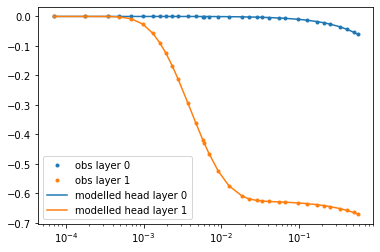

In [13]:
plt.semilogx(tobs, hobs0, '.C0', label="obs layer 0")
plt.semilogx(tobs, hobs1, '.C1', label="obs layer 1")

hm = ml.head(robs, 0, tobs)
plt.semilogx(tobs, hm[0], 'C0', label="modelled head layer 0")
plt.semilogx(tobs, hm[1], 'C1', label="modelled head layer 1")

plt.legend(loc="best")